In [ ]:
# Dataset : https://www.dropbox.com/s/sz7jqh5yzhc2v56/archive.zip?dl=0
 
!wget https://www.dropbox.com/s/sz7jqh5yzhc2v56/archive.zip?dl=0

--2021-06-10 14:05:14--  https://www.dropbox.com/s/sz7jqh5yzhc2v56/archive.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sz7jqh5yzhc2v56/archive.zip [following]
--2021-06-10 14:05:14--  https://www.dropbox.com/s/raw/sz7jqh5yzhc2v56/archive.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0104d489d42c800de9659131ea.dl.dropboxusercontent.com/cd/0/inline/BQKWBBYKfHnlUEluW4fLvN9T9r2XeOMSwhgUAM4Va7MZX5VjFbeL4KJZ8RefxuXmWKohbsrUzKA-jAIj0gVzwTx0iSiOgrurQjYNZMT6tFCPiQ-mxNjHvUgcHyvG6JkWChnugzT8qn1SwgdDJCEtGOwA/file# [following]
--2021-06-10 14:05:15--  https://uc0104d489d42c800de9659131ea.dl.dropboxusercontent.com/cd/0/inline/BQKWBBYKfHnlUEluW4fLvN9T9r2XeOMSwhgUAM4Va7MZX5VjFbeL4KJZ8RefxuXmWKohbsrUzKA-jAIj0gVzwTx0

In [ ]:
!unzip archive.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: archive/Data/train/NORMAL/NORMAL(582).jpg  
  inflating: archive/Data/train/NORMAL/NORMAL(583).jpg  
  inflating: archive/Data/train/NORMAL/NORMAL(584).jpg  
  inflating: archive/Data/train/NORMAL/NORMAL(585).jpg  
  inflating: archive/Data/train/NORMAL/NORMAL(586).jpg  
  inflating: archive/Data/train/NORMAL/NORMAL(587).jpg  
  inflating: archive/Data/train/NORMAL/NORMAL(588).jpg  
  inflating: archive/Data/train/NORMAL/NORMAL(589).jpg  
  inflating: archive/Data/train/NORMAL/NORMAL(59).jpg  
  inflating: archive/Data/train/NORMAL/NORMAL(590).jpg  
  inflating: archive/Data/train/NORMAL/NORMAL(591).jpg  
  inflating: archive/Data/train/NORMAL/NORMAL(592).jpg  
  inflating: archive/Data/train/NORMAL/NORMAL(593).jpg  
  inflating: archive/Data/train/NORMAL/NORMAL(594).jpg  
  inflating: archive/Data/train/NORMAL/NORMAL(595).jpg  
  inflating: archive/Data/train/NORMAL/NORMAL(596).jpg  
  inflating: archive/Data/train/NORMAL

In [ ]:
TRAIN_PATH = "archive/Data/train"
VAL_PATH = "archive/Data/test"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import ShuffleSplit

In [ ]:
# Train set
print("Covid19  ",len(os.listdir(TRAIN_PATH+"/COVID19")))
print("Normal   ",len(os.listdir(TRAIN_PATH+"/NORMAL")))
print("Pneumonia",len(os.listdir(TRAIN_PATH+"/PNEUMONIA")))

Covid19   3404
Normal    2960
Pneumonia 2842


In [ ]:
#Test set
print("Covid19   ",len(os.listdir(VAL_PATH+"/COVID19")))
print("Normal    ",len(os.listdir(VAL_PATH+"/NORMAL")))
print("Pneumonia ",len(os.listdir(VAL_PATH+"/PNEUMONIA")))

Covid19    596
Normal     317
Pneumonia  533


In [ ]:
covid_sample = imread(TRAIN_PATH+"/COVID19"+"/COVID19(189).jpg")
covid_sample.shape

(2000, 2000)

In [ ]:
pneumonia_sample= imread(TRAIN_PATH+"/PNEUMONIA"+"/PNEUMONIA(1000).jpg")
pneumonia_sample.shape

(1008, 1136, 3)

In [ ]:
normal_sample = imread(TRAIN_PATH+"/NORMAL"+"/NORMAL(342).jpg")
normal_sample.shape

(1013, 1472, 3)

In [ ]:
train_gen = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    rescale=1/255,
    validation_split=0.2,
)
test_gen=ImageDataGenerator(rescale=1/255)

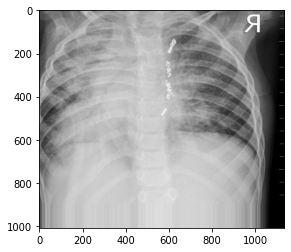

In [ ]:
plt.imshow(train_gen.random_transform(pneumonia_sample))


In [ ]:
train_generator = train_gen.flow_from_directory(
    TRAIN_PATH,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
    subset='training'
    )

Found 7366 images belonging to 3 classes.


In [ ]:
val_generator = train_gen.flow_from_directory(
    TRAIN_PATH,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    )

Found 1840 images belonging to 3 classes.


In [ ]:
test_generator =test_gen.flow_from_directory(
     VAL_PATH,
     batch_size= 64,
     target_size=(224,224),
     class_mode='categorical',
     shuffle=False

)

Found 1446 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [ ]:
trainShape=train_generator.__getitem__(0)[0].shape
testShape=test_generator.__getitem__(0)[0].shape
#Shape of Data
print("Train Shape \n",trainShape)
print("Test Shape \n",testShape)

Train Shape 
 (64, 224, 224, 3)
Test Shape 
 (64, 224, 224, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array




In [ ]:
num_classes = len(train_generator.class_indices)
model = Sequential()

model.add(DenseNet201(include_top=False, pooling='max',input_shape=(224,224,3), weights="imagenet"))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.layers[0].trainable = False

74842112/74836368 [==============================] - 1s 0us/step


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(
        train_generator, validation_data = val_generator, steps_per_epoch = 115, epochs = 20)

Epoch 1/20
115/115 [==============================] - 224s 2s/step - loss: 0.4376 - accuracy: 0.8836 - val_loss: 0.2306 - val_accuracy: 0.9223
Epoch 2/20
115/115 [==============================] - 174s 2s/step - loss: 0.2327 - accuracy: 0.9119 - val_loss: 0.1588 - val_accuracy: 0.9451
Epoch 3/20
115/115 [==============================] - 174s 2s/step - loss: 0.1779 - accuracy: 0.9356 - val_loss: 0.1396 - val_accuracy: 0.9467
Epoch 4/20
115/115 [==============================] - 174s 2s/step - loss: 0.1639 - accuracy: 0.9385 - val_loss: 0.1466 - val_accuracy: 0.9467
Epoch 5/20
115/115 [==============================] - 174s 2s/step - loss: 0.1825 - accuracy: 0.9326 - val_loss: 0.1715 - val_accuracy: 0.9364
Epoch 6/20
115/115 [==============================] - 174s 2s/step - loss: 0.1476 - accuracy: 0.9462 - val_loss: 0.1309 - val_accuracy: 0.9549
Epoch 7/20
115/115 [==============================] - 176s 2s/step - loss: 0.1465 - accuracy: 0.9449 - val_loss: 0.1393 - val_accuracy: 0.9457

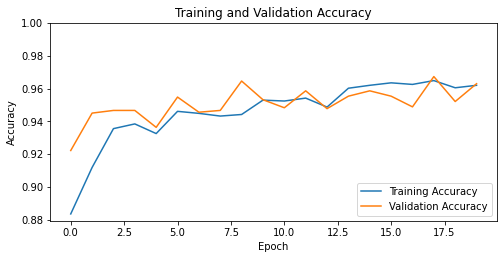

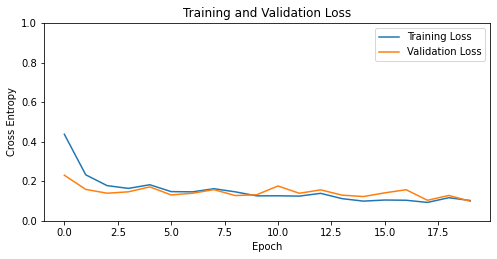

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator,verbose=2)
print('The testing accuracy is :{:.2f}%'.format(test_acc * 100)),
print('The testing loss is :{:.2f}%'.format(test_loss * 100))

23/23 - 27s - loss: 0.1009 - accuracy: 0.9654
The testing accuracy is :96.54%
The testing loss is :10.09%


In [ ]:
import itertools  

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
target_names = []

for key in train_generator.class_indices:

    target_names.append(key)

print(target_names)

['COVID19', 'NORMAL', 'PNEUMONIA']


Confusion Matrix
Normalized confusion matrix


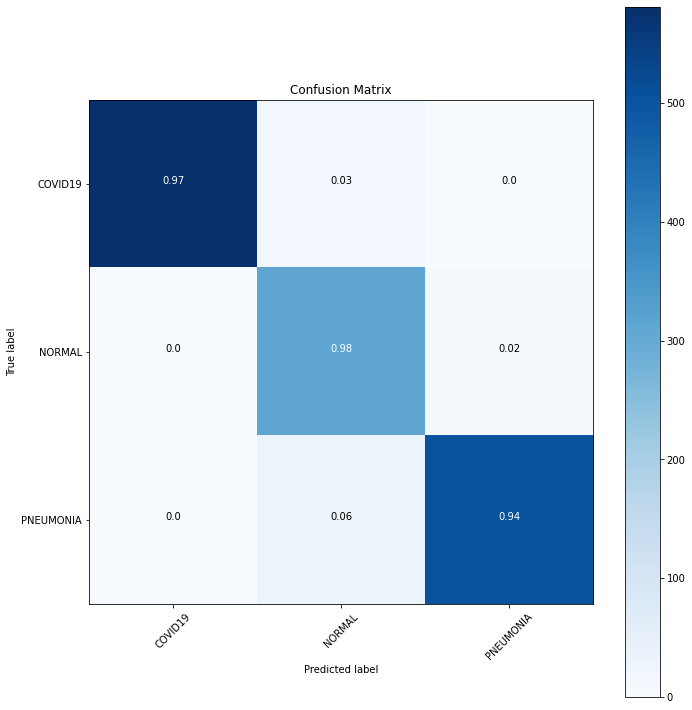

In [ ]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     COVID19       1.00      0.97      0.99       596
      NORMAL       0.87      0.98      0.93       317
   PNEUMONIA       0.99      0.94      0.97       533

    accuracy                           0.97      1446
   macro avg       0.95      0.97      0.96      1446
weighted avg       0.97      0.97      0.97      1446



In [ ]:
#covid_class
specificity= (cm[1,1]+cm[2,2])/(cm[2,2]+cm[1,1]+cm[1,0]+cm[2,0])
print("specificity: {:.4f}".format(specificity))
sensitivity= cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2])
print("sensitivity: {:.4f}".format(sensitivity))

specificity: 1.0000
sensitivity: 0.9748


In [ ]:
#normal class
specificity=(cm[0,0]+cm[2,2])/(cm[0,0]+cm[2,2]+cm[0,1]+cm[2,1])
print("specificity: {:.4f}".format(specificity))
sensitivity=cm[1,1]/(cm[1,1]+cm[1,0]+cm[1,2])
print("sensitivity: {:.4f}".format(sensitivity))

specificity: 0.9601
sensitivity: 0.9842


In [ ]:
#Pneumonia class
specificity=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,2]+cm[1,2])
print("specificity: {:.4f}".format(specificity))
sensitivity=cm[2,2]/(cm[2,2]+cm[2,0]+cm[2,1])
print("sensitivity: {:.4f}".format(sensitivity))

specificity: 0.9944
sensitivity: 0.9437


In [ ]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

img_width=224 
img_height = 224
# load the model we saved
model = load_model('my_model')

# Get test image ready
test_image = image.load_img('/content/archive/Data/test/COVID19/COVID-2785.png', target_size=(img_width, img_height))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

test_image = test_image.reshape(1,img_width, img_height,3)   

result = model.predict(test_image, batch_size=1)
print (result)


[[9.999229e-01 7.713905e-05 3.597259e-10]]
